#### Problem Statement: MultiClass Image Classification

In [1]:
import numpy as np 
import pandas as pd 
import os 
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import re

In [2]:
print(os.listdir('../input/flowers-recognition/flowers'))
daisy_dir='../input/flowers-recognition/flowers/daisy'
dandelion_dir='../input/flowers-recognition/flowers/dandelion'
rose_dir='../input/flowers-recognition/flowers/rose'
sunflower_dir='../input/flowers-recognition/flowers/sunflower'
tulip_dir='../input/flowers-recognition/flowers/tulip' 

X = [] 
y_label = []
imgsize = 128 
def training_data(label,data_dir):
    print ("classes",data_dir) 
    for img in os.listdir(data_dir): 
        path = os.path.join(data_dir,img) 
        img = cv2.imread(path)
        img = cv2.resize(img,(imgsize,imgsize)) 
        X.append(np.array(img)) 
        y_label.append(str(label))
training_data('daisy',daisy_dir) 
training_data('dandelion',dandelion_dir) 
training_data('rose',rose_dir)
training_data('sunflower',sunflower_dir) 
training_data('tulip',tulip_dir)

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
classes ../input/flowers-recognition/flowers/daisy
classes ../input/flowers-recognition/flowers/dandelion
classes ../input/flowers-recognition/flowers/rose
classes ../input/flowers-recognition/flowers/sunflower
classes ../input/flowers-recognition/flowers/tulip


In [3]:
df = pd.DataFrame({
    'y': y_label,
    'X': X
})
df.head(5)  # ['daisy','dandelion', 'rose','sunflower','tulip']

,y,X
0,daisy,"[[[214, 235, 233], [224, 233, 235], [226, 232,..."
1,daisy,"[[[80, 112, 93], [71, 107, 87], [65, 105, 84],..."
2,daisy,"[[[85, 130, 164], [78, 123, 160], [71, 119, 15..."
3,daisy,"[[[6, 16, 16], [8, 16, 16], [8, 10, 11], [5, 6..."
4,daisy,"[[[76, 98, 104], [74, 97, 103], [72, 95, 103],..."


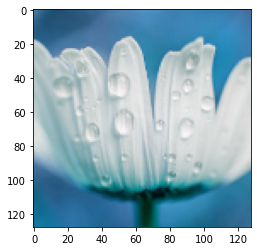

In [4]:
from tensorflow.keras.preprocessing import image
plt.imshow(X[2])

In [5]:
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.utils import to_categorical 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) 
y = to_categorical(y,5) 
X = np.array(X)

In [6]:
X.shape

(4317, 128, 128, 3)

In [7]:
y.shape

(4317, 5)

In [8]:
X[0]

array([[[214, 235, 233],
        [224, 233, 235],
        [226, 232, 236],
        ...,
        [196, 229, 219],
        [198, 230, 219],
        [202, 231, 218]],

       [[206, 226, 227],
        [210, 228, 230],
        [207, 228, 232],
        ...,
        [195, 228, 216],
        [191, 227, 213],
        [190, 227, 212]],

       [[228, 236, 240],
        [228, 239, 243],
        [224, 241, 244],
        ...,
        [177, 214, 200],
        [169, 210, 195],
        [168, 211, 196]],

       ...,

       [[146, 171, 178],
        [154, 166, 177],
        [162, 180, 186],
        ...,
        [159, 195, 188],
        [183, 215, 214],
        [194, 225, 226]],

       [[133, 135, 166],
        [145, 151, 182],
        [156, 173, 195],
        ...,
        [159, 197, 194],
        [191, 224, 228],
        [187, 222, 228]],

       [[197, 142, 155],
        [203, 125, 145],
        [212, 150, 166],
        ...,
        [169, 197, 199],
        [193, 217, 223],
        [185, 215, 222]]

In [9]:
X = X/255

In [10]:
y[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [13]:
import tensorflow
# get the model
def get_model():
    cnn = tensorflow.keras.Sequential() 
    cnn.add(tensorflow.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))) 
    cnn.add(tensorflow.keras.layers.MaxPooling2D((2, 2))) 
    cnn.add(tensorflow.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    cnn.add(tensorflow.keras.layers.MaxPooling2D((2, 2)))
    cnn.add(tensorflow.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
    cnn.add(tensorflow.keras.layers.MaxPooling2D((2, 2))) 
    cnn.add(tensorflow.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
    cnn.add(tensorflow.keras.layers.MaxPooling2D((2, 2)))
    cnn.add(tensorflow.keras.layers.Flatten())
    cnn.add(tensorflow.keras.layers.Dense(512, activation='relu')) 
    cnn.add(tensorflow.keras.layers.Dense(5, activation='softmax')) 
    cnn.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy']) 
    return cnn

In [15]:
model = get_model()
history = model.fit(X_train,y_train, epochs=5,validation_split=0.3) 

2021-11-02 13:40:35.238888: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
67/67 [==============================] - 25s 353ms/step - loss: 1.4838 - accuracy: 0.3510 - val_loss: 2.1500 - val_accuracy: 0.2723
Epoch 2/5
67/67 [==============================] - 24s 356ms/step - loss: 1.2101 - accuracy: 0.5019 - val_loss: 1.4536 - val_accuracy: 0.4697
Epoch 3/5
67/67 [==============================] - 24s 364ms/step - loss: 1.0568 - accuracy: 0.5818 - val_loss: 1.4254 - val_accuracy: 0.4168
Epoch 4/5
67/67 [==============================] - 24s 358ms/step - loss: 0.9470 - accuracy: 0.6343 - val_loss: 1.1726 - val_accuracy: 0.5270
Epoch 5/5
67/67 [==============================] - 23s 349ms/step - loss: 0.8257 - accuracy: 0.6816 - val_loss: 0.9291 - val_accuracy: 0.6593


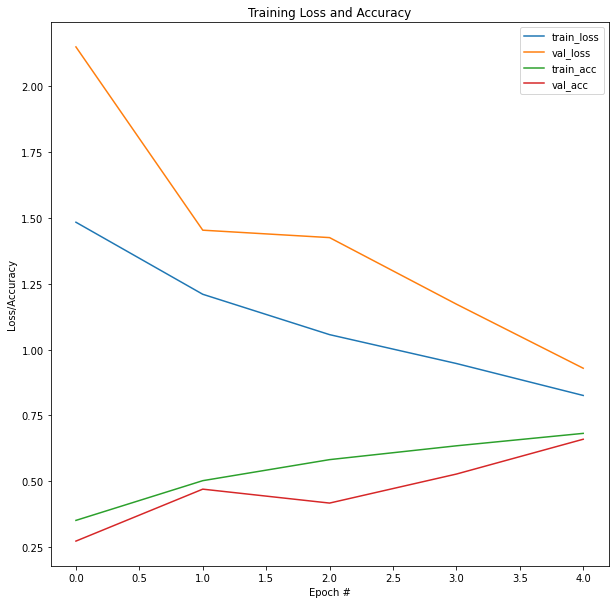

In [19]:
epochs=5
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [16]:
prediction = model.predict(X_test)
print(prediction[0])
print('predicted_class:', np.argmax(prediction[0])) # class 3 - sunflower

[1.8061693e-05 1.2269693e-06 1.6126956e-01 1.6539778e-05 8.3869457e-01]
predicted_class: 4


proba [9.8030293e-01 2.7833488e-03 9.1431113e-03 1.9328811e-04 7.5773033e-03]
predicted_class: 0


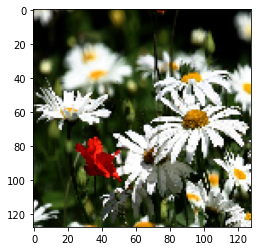

In [17]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/flowers-recognition/flowers/daisy/102841525_bd6628ae3c.jpg',target_size=(128,128,3))
imgs = image.img_to_array(img)
imgs = imgs/255.0
proba = model.predict(imgs.reshape(1,128,128,3))
print('proba',proba[0])
print("predicted_class:",np.argmax(proba[0]))
plt.imshow(img) # class 0 is daisy flower

proba [4.9644639e-04 1.1013572e-05 7.8944069e-01 2.8044367e-06 2.1004903e-01]
predicted_class: 2


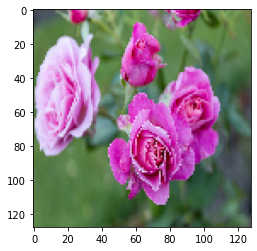

In [18]:
img = image.load_img('../input/flowers-recognition/flowers/rose/11944957684_2cc806276e.jpg',target_size=(128,128,3))
imgs = image.img_to_array(img)
imgs = imgs/255.0
proba = model.predict(imgs.reshape(1,128,128,3))
print('proba',proba[0])
print("predicted_class:",np.argmax(proba[0]))
plt.imshow(img) # class 2 is rose flower